<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_3_0_7_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.240697,59.790478,96.345138,-0.457889,221.918424,222.306316,-0.387892
1,0.0,1.0,31.170168,77.821530,29.746165,1.348487,150.086350,148.752371,1.333978
2,0.0,2.0,48.204779,51.898958,77.552351,-0.521437,187.134651,187.606600,-0.471949
3,0.0,3.0,29.816796,37.925826,51.403943,-0.388083,128.758483,129.129893,-0.371411
4,0.0,4.0,45.847129,98.844331,95.218304,-0.051827,249.857937,249.860446,-0.002509
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.357651,31.016573,69.036455,0.336718,160.747397,160.345890,0.401507
249996,999.0,246.0,28.432652,45.178178,97.441154,0.126247,181.178230,180.966562,0.211668
249997,999.0,247.0,39.746505,58.334134,56.378939,-0.328157,164.131421,164.404535,-0.273114
249998,999.0,248.0,93.773014,61.266084,73.296155,-0.992911,237.342343,238.326655,-0.984313


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.240697  59.790478  96.345138  ...  221.918424  222.306316 -0.387892
      1.0    31.170168  77.821530  29.746165  ...  150.086350  148.752371  1.333978
      2.0    48.204779  51.898958  77.552351  ...  187.134651  187.606600 -0.471949
      3.0    29.816796  37.925826  51.403943  ...  128.758483  129.129893 -0.371411
      4.0    45.847129  98.844331  95.218304  ...  249.857937  249.860446 -0.002509
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  50.357651  31.016573  69.036455  ...  160.747397  160.345890  0.401507
      246.0  28.432652  45.178178  97.441154  ...  181.178230  180.966562  0.211668
      247.0  39.746505  58.334134  56.378939  ...  164.131421  164.404535 -0.273114
      248.0  93.773014  61.266084  73.296155  ...  237.342343  238.326655 -0.984313
      249.0  57.794771  24.092458  97.635080  ...  191.007810  189.451785  1.556024

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.240697  59.790478  96.345138  ...  221.918424  222.306316 -0.387892
      1.0    31.170168  77.821530  29.746165  ...  150.086350  148.752371  1.333978
      2.0    48.204779  51.898958  77.552351  ...  187.134651  187.606600 -0.471949
      3.0    29.816796  37.925826  51.403943  ...  128.758483  129.129893 -0.371411
      4.0    45.847129  98.844331  95.218304  ...  249.857937  249.860446 -0.002509
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  50.357651  31.016573  69.036455  ...  160.747397  160.345890  0.401507
      246.0  28.432652  45.178178  97.441154  ...  181.178230  180.966562  0.211668
      247.0  39.746505  58.334134  56.378939  ...  164.131421  164.404535 -0.273114
      248.0  93.773014  61.266084  73.296155  ...  237.342343  238.326655 -0.984313
      249.0  57.794771  24.092458  97.635080  ...  191.007810  189.451785  1.556024

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.240697,59.790478,96.345138,-0.457889,221.918424,222.306316,-0.387892
1,0.0,1.0,31.170168,77.821530,29.746165,1.348487,150.086350,148.752371,1.333978
2,0.0,2.0,48.204779,51.898958,77.552351,-0.521437,187.134651,187.606600,-0.471949
3,0.0,3.0,29.816796,37.925826,51.403943,-0.388083,128.758483,129.129893,-0.371411
4,0.0,4.0,45.847129,98.844331,95.218304,-0.051827,249.857937,249.860446,-0.002509
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.357651,31.016573,69.036455,0.336718,160.747397,160.345890,0.401507
249996,999.0,246.0,28.432652,45.178178,97.441154,0.126247,181.178230,180.966562,0.211668
249997,999.0,247.0,39.746505,58.334134,56.378939,-0.328157,164.131421,164.404535,-0.273114
249998,999.0,248.0,93.773014,61.266084,73.296155,-0.992911,237.342343,238.326655,-0.984313


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    56.240697  59.790478  96.345138  ...  221.918424  222.306316 -0.387892
      1.0    31.170168  77.821530  29.746165  ...  150.086350  148.752371  1.333978
      2.0    48.204779  51.898958  77.552351  ...  187.134651  187.606600 -0.471949
      3.0    29.816796  37.925826  51.403943  ...  128.758483  129.129893 -0.371411
      4.0    45.847129  98.844331  95.218304  ...  249.857937  249.860446 -0.002509
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  50.357651  31.016573  69.036455  ...  160.747397  160.345890  0.401507
      246.0  28.432652  45.178178  97.441154  ...  181.178230  180.966562  0.211668
      247.0  39.746505  58.334134  56.378939  ...  164.131421  164.404535 -0.273114
      248.0  93.773014  61.266084  73.296155  ...  237.342343  238.326655 -0.984313
      249.0  57.794771  24.092458  97.635080  ...  191.007810  189.451785  1.556024

[250000 rows x 7 columns]

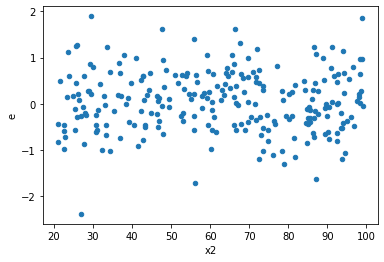

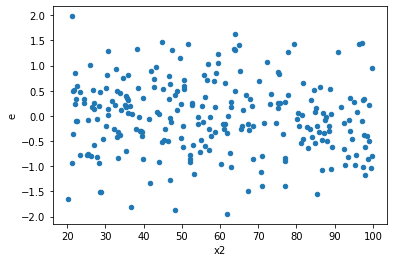

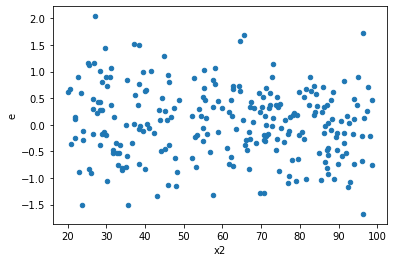

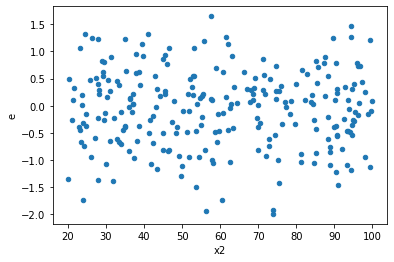

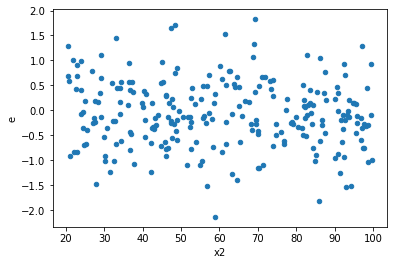

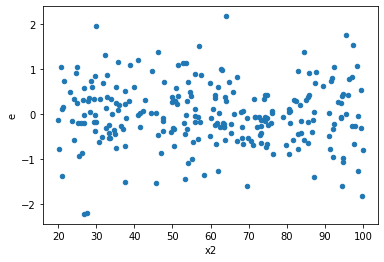

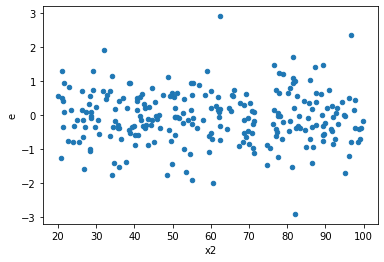

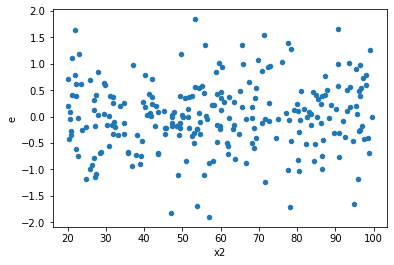

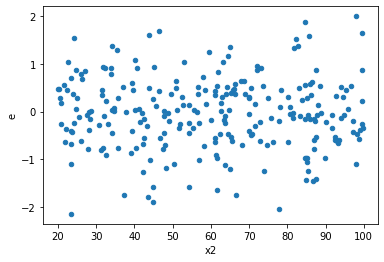

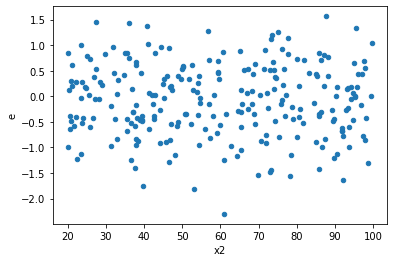

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,118.0,126.0,52.69824060733284,62.28400289753189,0.45041231288318667,0.49827202318025515,1.1068578828968632,0.5776430119128642,0.7111784940435679,Reject005=1 : Homoscedasticity
10.0,125.0,119.0,45.02490164130702,57.392605247527165,0.36310404549441144,0.4863780105722641,1.3389557301023667,0.10766167487549838,0.9461691625622508,Reject005=1 : Homoscedasticity
17.0,123.0,121.0,50.48125462902714,49.67588350868765,0.41378077564776344,0.4139656959057304,1.0003113603928961,0.9982358391605273,0.5008820804197364,Reject005=1 : Homoscedasticity
18.0,123.0,121.0,65.50157989474894,74.67409060519952,0.5368981958585979,0.6222840883766627,1.158878506694264,0.4162571675805071,0.7918714162097464,Reject005=1 : Homoscedasticity
19.0,117.0,127.0,49.00605475893124,71.04326774938968,0.4224659893011314,0.5638354583284896,1.3355351697018332,0.11298406877432399,0.943507965612838,Reject005=1 : Homoscedasticity
21.0,117.0,127.0,55.153119474305285,70.6113886569545,0.47545792650263174,0.5604078464837658,1.179469763709527,0.36548833360936905,0.8172558331953155,Reject005=1 : Homoscedasticity
23.0,139.0,105.0,63.18973665938683,63.431457181524344,0.4578966424593249,0.6099178575146571,1.3288735096120081,0.11689486923999137,0.9415525653800043,Reject005=1 : Homoscedasticity
25.0,128.0,116.0,62.00646261544082,67.42554857758996,0.4882398631137072,0.5863091180659997,1.1998846924783064,0.3139939829345373,0.8430030085327314,Reject005=1 : Homoscedasticity
26.0,106.0,138.0,43.35916963024836,71.83883582741004,0.412944472669032,0.5243710644336499,1.2726386489039556,0.19331637285879144,0.9033418135706043,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,125.0,119.0,64.13362520177466,42.369779345175694,0.5172066548530215,0.3590659266540313,0.6939584438070908,0.04518476737871565,Reject005=0 : Heteroscedasticity
1.0,118.0,126.0,52.69824060733284,62.28400289753189,0.45041231288318667,0.49827202318025515,1.1068578828968632,1.4223569880871358,Reject005=1 : Homoscedasticity
2.0,113.0,131.0,51.88911730266321,59.338024400443516,0.46329569020235006,0.4564463415418732,0.9864247212388892,0.9365491669739242,Reject005=1 : Homoscedasticity
3.0,119.0,125.0,75.60258553967242,70.83929317312489,0.640699877454851,0.5712846223639104,0.8920198511653588,0.5279181687718482,Reject005=1 : Homoscedasticity
4.0,132.0,112.0,77.46721212181141,53.80304255315818,0.5913527642886367,0.4847120950734971,0.8185492544078693,0.2753123152333816,Reject005=1 : Homoscedasticity
5.0,112.0,132.0,68.17535338138772,60.82043216402616,0.6141923728052948,0.4642781081223371,0.7569482607708091,0.12408337470043286,Reject005=1 : Homoscedasticity
6.0,131.0,113.0,66.9223381501782,52.406896734764274,0.5147872165398324,0.4679187208461096,0.9078418307533082,0.5987419462282771,Reject005=1 : Homoscedasticity
7.0,118.0,126.0,65.68459560000379,51.191010293168965,0.5614068000000324,0.4095280823453517,0.7298634783314314,0.08256750252905443,Reject005=1 : Homoscedasticity
8.0,130.0,114.0,69.87441560157158,53.135313400140575,0.5416621364462914,0.47022401239062456,0.8671686299500372,0.43640327840150517,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      915
Reject005=0 : Heteroscedasticity     85
Name: Result_test, dtype: int64